YAPAY SİNİR AĞLARI (ANN) İLE RAKAM TANIMA

1- İş problemi

2- Veriyi anlamak

3- Veriyi hazırlama

4- Modelleme

5- Değerlendirme

In [ ]:
# Gerekli kütüphaneler
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
import numpy as np
import warnings
from warnings import filterwarnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings('ignore')

In [ ]:
#Mnist veri setinin yüklenmesi
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Eğitim setinin boyutu: ", x_train.shape, y_train.shape)
print("Eğitim setinin boyutu: ", x_test.shape, y_test.shape)

Eğitim setinin boyutu:  (60000, 28, 28) (60000,)
Eğitim setinin boyutu:  (10000, 28, 28) (10000,)


In [ ]:
# Veri setinden ilk 10 örnek
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax=plt.subplot(5,5,n+1)
    plt.imshow(x_train[n], cmap='gray')
    plt.axis('off')

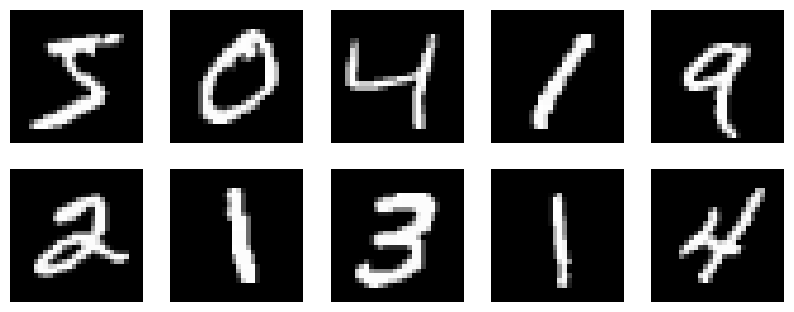

In [ ]:
visualize_img(x_train)

Bilgisayarlar bir renk göstermek istediğinde RGB renk kodlarını kullanır:

Kırmızı, yeşil ve mavi

r: 250 g: 0 b: 250 mor

En parlak renk (255,255,255) = beyaz

En koyu renk (0,0,0) = siyah

In [ ]:
# Veri görselleştirme
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12)) # Change figsize(12,12) to figsize=(12,12)
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
  width, height = img.shape

  treshold = img.max()/2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y], 2)), xy=(y,x),
                  color='white' if img[x][y]<treshold else 'black')

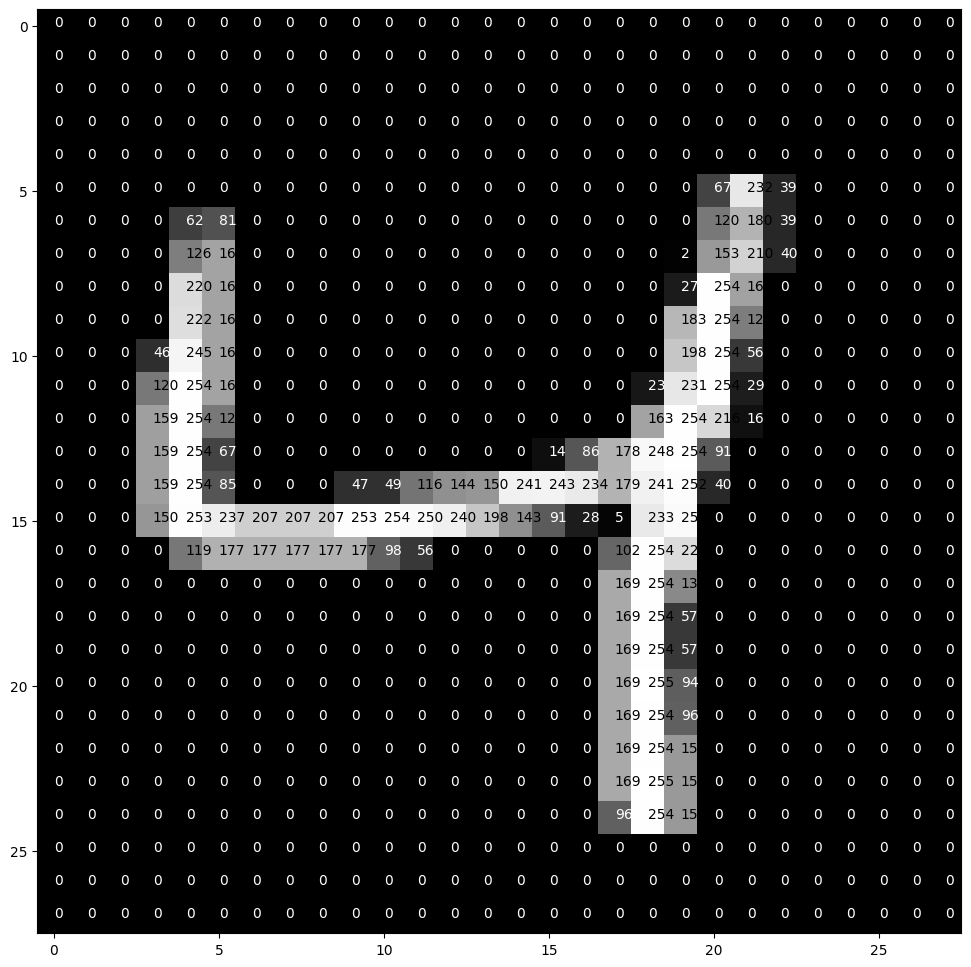

In [ ]:
pixel_visualize(x_train[2])

In [ ]:
# Encoding -> binary e çevirme

y_train[0:5] # öncesi

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0:5] # sonrasi

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
# Reshaping yeniden şekillendirme

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [ ]:
# Standardization

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
# Modelling

model = tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128, activation='relu', name='layer1'),
    Dense(units=10, activation='softmax', name='output_layer')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer1 (Dense)                       │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9981 - loss: 0.0108 - precision: 0.9985 - recall: 0.9976 - val_accuracy: 0.9804 - val_loss: 0.0727 - val_precision: 0.9813 - val_recall: 0.9789
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9984 - loss: 0.0091 - precision: 0.9986 - recall: 0.9981 - val_accuracy: 0.9807 - val_loss: 0.0710 - val_precision: 0.9822 - val_recall: 0.9794
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9984 - loss: 0.0082 - precision: 0.9986 - recall: 0.9983 - val_accuracy: 0.9772 - val_loss: 0.0861 - val_precision: 0.9784 - val_recall: 0.9764
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9989 - loss: 0.0069 - precision: 0.9991 - recall: 0.9988 - val_accuracy: 0.9809 - val_loss: 0.0728 - val_precision: 0.9821 - val_recall: 0.9801
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9988 - loss: 0.0066 - precision: 0.9990 - recall: 0.9987 - val_accuracy: 0.9785 - val_loss: 0.

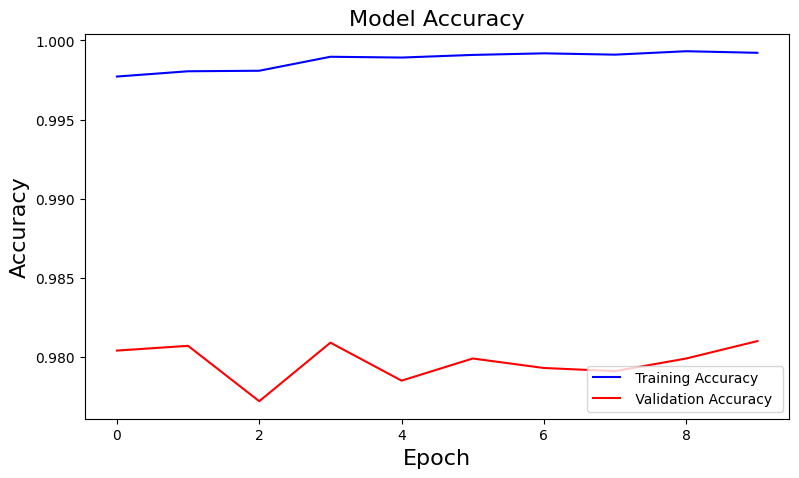

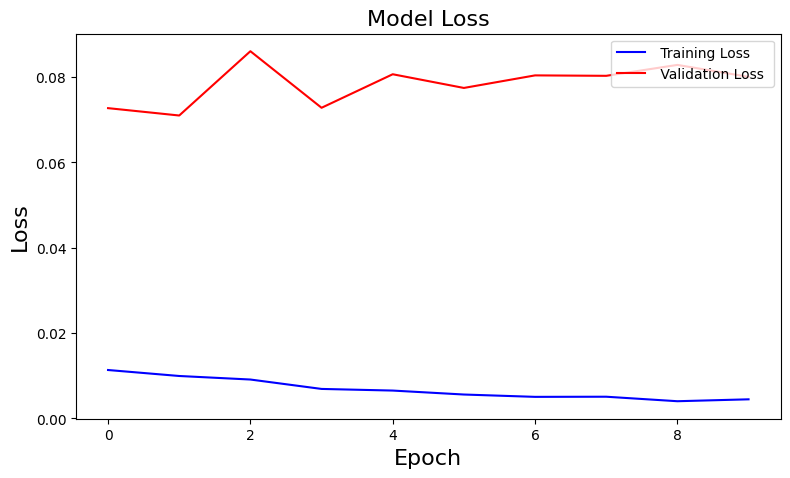

In [ ]:
# Evaluation Değerlendirme - Grafikler

#----------------------------Accuracy---------------------------------
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b', label=' Training Accuracy ')
plt.plot(history.history['val_accuracy'], color='r', label=' Validation Accuracy ')
plt.legend(loc='lower right')
plt.title('Model Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

#----------------------------Loss--------------------------------------
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='b', label=' Training Loss ')
plt.plot(history.history['val_loss'], color='r', label=' Validation Loss ')
plt.legend(loc='upper right')
plt.title('Model Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

In [ ]:
model.save('mnist_model.h5')

In [ ]:
import random

random = random.randint(0, 10000)
random

8862

In [ ]:
test_image = x_test[random]
y_test[random]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

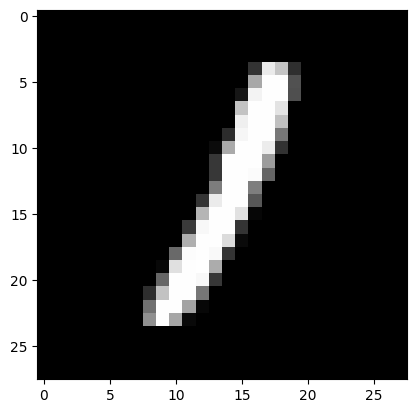

In [ ]:
plt.imshow(test_image.reshape(28,28), cmap='gray')

In [ ]:
test_data = x_test[random].reshape(1,28,28,1)

In [ ]:
probability = model.predict(test_data)
probability

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[2.5685514e-11, 9.9999976e-01, 7.0773879e-08, 4.0767067e-13,
        3.8125050e-09, 6.1802188e-15, 4.5993981e-13, 9.9746075e-08,
        5.3483586e-08, 3.7213806e-14]], dtype=float32)

In [ ]:
predict_output = np.argmax(probability)
predict_output

1